### Inputs

In [1]:
from CSIKit.filters.passband import lowpass
from CSIKit.filters.statistical import running_mean
from CSIKit.util.filters import hampel

from CSIKit.reader import get_reader
from CSIKit.tools.batch_graph import *
from CSIKit.tools.convert_csv import *
from CSIKit.util import csitools

import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pywt
import pywt.data

### Converting to csv functions

In [2]:
def convert_pcap_to_csv(inp):
    infile = inp
    inp = inp.replace("pcap","csv")
    outfile = "csi_tests_csv/" + inp
    generate_csv(infile, outfile, "amplitude")
    
    
# file_name = ["Falldown_","Hand_circle_","Hand_move_up_","Nothing_","Smoking_","Walking_along_","Walking_Perpendicular_"]
# for i in range(len(file_name)):
#     temp = file_name[i]
#     for j in range(15):
#         convert_pcap_to_csv(temp + str(j+1)+".pcap")
        

### One heatmap plot function

In [3]:
def plot1(inp):
    my_reader = get_reader(inp)
    csi_data = my_reader.read_file(inp, scaled=True)
    csi_matrix, no_frames, no_subcarriers = csitools.get_CSI(csi_data, metric="amplitude")

    bg = BatchGraph(inp)
    bg.heatmap()

### File lists

In [4]:
pcap_lst = ["csi_tests_pcap/" + f for f in listdir('csi_tests_pcap')]
csv_lst = ["csi_tests_csv/" + f for f in listdir('csi_tests_csv')]
csv_lst_names = [f for f in listdir('csi_tests_csv')]

### List of csv file dataframes

In [5]:
lst = []
l = {x for x in range(257)} 

for filename in csv_lst:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = np.arange(0,len(df.columns))
    lst.append(df)
lst[0]

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,28.438554,42.784106,25.158738,30.257154,20.530784,29.647309,53.220228,53.448342,53.702021,53.209373,...,54.070032,54.094766,54.279484,54.497714,54.026156,38.348021,35.224442,36.651117,29.268567,25.289167
1,36.371894,42.784106,48.723311,46.458642,45.775492,46.813950,46.850696,45.938397,44.630714,43.747117,...,48.545307,50.027922,49.876171,49.010440,49.224815,50.109103,48.359758,48.723311,47.442773,26.821451
2,17.242759,42.784106,31.740598,29.030900,30.989896,20.374265,53.632659,54.002841,54.214196,54.109610,...,54.614880,53.094023,54.161893,53.921920,53.662997,36.237660,18.129134,26.665180,22.278867,13.979400
3,37.595923,42.784106,45.904517,45.650209,44.639676,46.958318,46.371293,44.276484,44.791000,44.010730,...,48.648432,47.959078,49.660572,49.001814,47.531846,48.106424,48.324706,46.912053,46.378198,37.294888
4,24.668676,42.784106,28.325089,27.032914,29.840770,32.842051,53.345281,52.877592,54.921231,52.640737,...,54.571625,53.845469,53.774884,53.872474,53.791858,31.182647,30.398106,13.010300,28.603380,25.118834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,21.958997,42.784106,29.036325,34.284588,33.376589,33.215984,46.187800,45.183165,45.722790,43.646073,...,51.073796,49.238913,51.183706,50.365690,49.050669,30.433623,31.392492,6.989700,30.923697,22.148438
326,28.382192,42.784106,50.449981,50.158625,48.549919,48.160622,46.560311,49.995307,49.448872,49.444136,...,50.003690,49.317629,50.829289,51.094739,48.592584,51.269913,49.638303,48.401061,49.149246,29.375179
327,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
328,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


### Amplitude heatmap

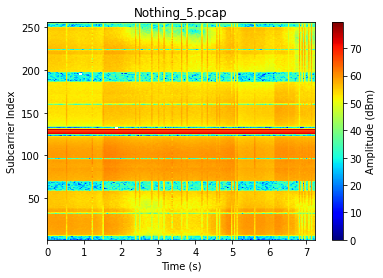

In [6]:
plot1(pcap_lst[55])

### Line plot of one subcarrier

<AxesSubplot:>

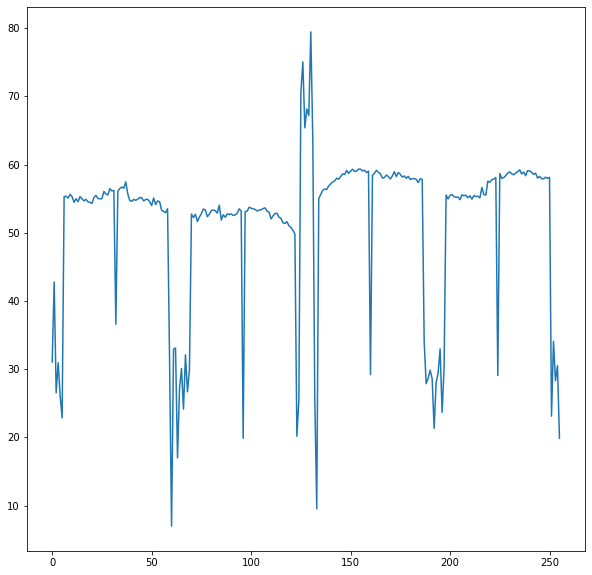

In [7]:
pd.DataFrame(lst[55].iloc[10]).plot.line(figsize=
[10,10], legend=False)

### Subcarrier correlation plot

In [8]:
# i=0
# for DataFrame in lst:
#     plt.title(csv_lst[i][14::])
#     sns.heatmap(DataFrame.corr())
#     plt.show()
#     i+=1

### Changing all nan and -inf to mean

In [9]:
print(lst[0])
for DataFrame in lst:
    DataFrame.replace(-np.inf, np.nan, inplace=True)
    DataFrame.replace(np.nan, DataFrame.mean(), inplace=True)
print(lst[0])

           0          1          2          3          4          5    \
0    28.438554  42.784106  25.158738  30.257154  20.530784  29.647309   
1    36.371894  42.784106  48.723311  46.458642  45.775492  46.813950   
2    17.242759  42.784106  31.740598  29.030900  30.989896  20.374265   
3    37.595923  42.784106  45.904517  45.650209  44.639676  46.958318   
4    24.668676  42.784106  28.325089  27.032914  29.840770  32.842051   
..         ...        ...        ...        ...        ...        ...   
325  21.958997  42.784106  29.036325  34.284588  33.376589  33.215984   
326  28.382192  42.784106  50.449981  50.158625  48.549919  48.160622   
327       -inf       -inf       -inf       -inf       -inf       -inf   
328       -inf       -inf       -inf       -inf       -inf       -inf   
329       -inf       -inf       -inf       -inf       -inf       -inf   

           6          7          8          9    ...        246        247  \
0    53.220228  53.448342  53.702021  53.2093

### Data Normalisation and concatenation 

In [10]:
scaler = StandardScaler()
for i in range(len(lst)):
    lst[i] = pd.DataFrame(scaler.fit_transform(lst[i]), columns = lst[i].columns)
lst_concat = pd.concat(lst)
lst_concat

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.642365e-01,0.0,-1.054886,-7.499745e-01,-1.393886e+00,-0.818161,0.116531,1.206423e-01,1.675234e-01,0.055084,...,3.702218e-01,0.363542,3.788261e-01,0.415935,3.398975e-01,-1.451683e-01,-0.394771,-0.229705,-0.594813,-2.842154e-01
1,9.375382e-01,0.0,0.674650,4.646976e-01,4.233916e-01,0.482478,-1.110082,-1.499101e+00,-1.645825e+00,-1.861787,...,-9.887193e-01,-0.596315,-6.535962e-01,-0.801906,-6.983747e-01,7.700077e-01,0.625955,0.666093,0.614716,-1.099226e-01
2,-1.719098e+00,0.0,-0.571807,-8.419103e-01,-6.409716e-01,-1.520738,0.195955,2.402364e-01,2.699069e-01,0.237455,...,5.042406e-01,0.127347,3.512553e-01,0.288144,2.613657e-01,-3.093837e-01,-1.723224,-0.970695,-1.059991,-1.570669e+00
3,1.107530e+00,0.0,0.467763,4.040870e-01,3.416281e-01,0.493416,-1.202403,-1.857542e+00,-1.613783e+00,-1.808384,...,-9.633532e-01,-1.084604,-7.041466e-01,-0.803821,-1.064473e+00,6.141714e-01,0.623231,0.531691,0.543867,1.081401e+00
4,-6.877936e-01,0.0,-0.822490,-9.917050e-01,-7.236931e-01,-0.576110,0.140613,-2.456940e-03,4.112427e-01,-0.060111,...,4.936009e-01,0.304703,2.605151e-01,0.277170,2.892315e-01,-7.027341e-01,-0.769819,-1.983934,-0.639083,-3.035904e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,2.612426e-02,0.0,-1.229319,-1.305763e+00,-8.918293e-01,-1.427240,0.924191,8.797113e-01,6.997202e-01,0.855265,...,1.578682e+00,1.443070,1.384931e+00,1.311766,1.302980e+00,-1.174116e+00,-0.835476,-0.843501,-0.905892,-5.861355e-01
335,1.917697e-01,0.0,0.689153,6.103968e-01,6.546335e-01,0.560254,-1.373960,-1.340764e+00,-1.616100e+00,-1.017944,...,-4.940486e-01,-0.872398,-6.128707e-01,-0.855429,-6.160992e-01,8.045680e-01,0.694720,0.701954,0.820292,5.006967e-01
336,3.232868e-01,0.0,-0.498878,-1.465325e+00,-6.806623e-01,-0.586960,0.891103,8.665769e-01,8.612281e-01,0.617013,...,1.606712e+00,1.479391,1.365151e+00,1.578389,1.452529e+00,-9.602883e-01,-0.929312,-1.274703,-1.000234,-1.293662e+00
337,4.181689e-02,0.0,1.021087,9.476178e-01,8.984140e-01,0.929285,-0.145474,-3.943150e-01,-3.784357e-01,0.015799,...,3.261966e-01,0.403939,6.167339e-01,0.657548,2.992806e-01,1.107466e+00,0.980869,1.042439,1.008824,9.180686e-01


### PCA implementation

In [11]:
pca = PCA(0.83)
pca.fit(lst_concat)
pca.explained_variance_ratio_

array([0.26963106, 0.21318414, 0.16774838, 0.11044628, 0.05785691,
       0.0296289 ])

### PCA data transformation

In [12]:
i=0
pca_lst = []
for csv_temp in csv_lst_names:
    pca_temp = pd.DataFrame(pca.transform(lst[i]))
    i+=1
    pca_temp.to_csv("csipca_data/" + csv_temp)
    pca_lst.append(pca_temp)

### Wavelet

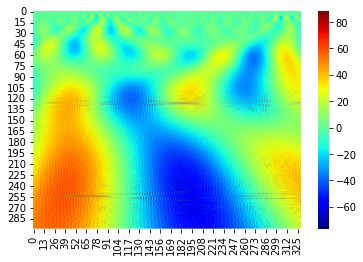

In [13]:
coef,freqs = pywt.cwt(pca_lst[0][0],np.arange(1,300),wavelet='morl')
sns.heatmap(coef, cmap='jet', shading='gouraud')
plt.show()